# Machine Learning

con este código establece las bases para un análisis profundo utilizando técnicas de aprendizaje automático. Las bibliotecas importadas permiten:
Manipular y visualizar datos.
Preprocesar datos categóricos.
Entrenar varios modelos predictivos (regresores y clasificadores).
Evaluar el rendimiento del modelo utilizando diferentes métricas.
Con este conjunto, puedes realizar tareas complejas como la preparación de datos, la modelización, la evaluación y la visualización, lo cual es esencial en proyectos de ciencia de datos y aprendizaje automático.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import (
    DecisionTreeRegressor,
    DecisionTreeClassifier,
    export_text,
    plot_tree
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import (
    mean_squared_log_error,
    mean_absolute_error,
    mean_squared_error,
    confusion_matrix,
    accuracy_score
)
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier
)

In [3]:
data = pd.read_csv('datos/Xanduria_transformado.csv', index_col=0)
data

,Id publicacion,Id cuenta,Nombre de la cuenta,Descripción,Duración (segundos),Hora de publicación,Enlace permanente,Tipo de publicación,Fecha,Impresiones,Alcance,Me gusta,Compartio,Comentarios,Guardadas
0,18036895583516630,17841469672972826,xanduria,#intercolombia #xanduria #gamer #gamemakerstud...,18,10/21/2024 17:52,https://www.instagram.com/reel/DBaC9mqqSpj/,Reel de Instagram,Total,115,90,9,1,0,1
1,17919913235991207,17841469672972826,xanduria,Exponiendo la primera fase del proyecto #xandu...,0,10/17/2024 13:10,https://www.instagram.com/p/DBPPi1UxMwq/,Secuencia de Instagram,Total,30,25,2,0,0,0
2,18280142476174642,17841469672972826,xanduria,#desarrolladores #deporte #intercolombia no t...,20,10/25/2024 10:07,https://www.instagram.com/reel/DBjgRUnx-D-/,Reel de Instagram,Total,13,13,3,0,0,0
3,18467311951007118,17841469672972826,xanduria,#intercolombia #xanduria semana de íntegra int...,17,10/23/2024 14:42,https://www.instagram.com/reel/DBe2eizxuu9/,Reel de Instagram,Total,46,40,1,0,0,0


# 2 - Análisis de datos nulos
Conociendo los datos nulos
Primero es necesario conocer los datos nulos que se puedan llegar a tener, que % de nulos hay por cada columna y que tipo de dato es

In [4]:
# Reemplazar cadenas que contienen "0" por NaN
data.replace(0, pd.NA, inplace=True)

# Contar los valores nulos en cada columna
count_nan = data.isna().sum().sort_values(ascending=False)
count_nan = count_nan[count_nan != 0]

# Verificar si hay columnas con valores nulos
if count_nan.empty:
    print("No hay valores nulos en el DataFrame.")
else:
    # Imprimir encabezado de la tabla
    print(f' {("-"*56)}\n'
          f'| {"Columna":^15} | {"# Nulos":^9} | {"% Nulos":^9} | {"Tipo de dato":^12} |\n'
          f' {("-"*56)}'
         )

    # Iterar sobre las columnas con valores nulos y mostrar información
    for c, n in zip(count_nan.index, count_nan):
        p = n / data.shape[0]  # Calcular porcentaje de nulos
        print(f'| {c:<15} | {n:<9} | {round(p * 100, 2):<9} | {str(data[c].dtypes):<12} |')

    # Imprimir línea final
    print(f' {("-"*56)}')

 --------------------------------------------------------
|     Columna     |  # Nulos  |  % Nulos  | Tipo de dato |
 --------------------------------------------------------
| Comentarios     | 4         | 100.0     | object       |
| Compartio       | 3         | 75.0      | object       |
| Guardadas       | 3         | 75.0      | object       |
| Duración (segundos) | 1         | 25.0      | object       |
 --------------------------------------------------------


# Tratamiento de nulos

Para el análisis inicial de Machine Learning vamos a realizar un tratamiento básico de los datos nulos, posteriormente se puede hacer un tratamiento más profundo

In [5]:
# Suponiendo que 'data' es tu DataFrame ya cargado con los datos
# Aquí puedes cargar tus datos. Por ejemplo:
# data = pd.read_csv('tu_archivo.csv')

# Obtener las columnas de tipo objeto (cadenas)
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Contar los valores nulos en cada columna
count_nan = data.isna().sum().sort_values(ascending=False)
count_nan = count_nan[count_nan != 0]

# Imprimir encabezado de la tabla
print(f' {("-"*42)}\n'
      f'| {"Columna":^15} | {"Valor nuevo":^22} |\n'
      f' {("-"*42)}'
     )

# Rellenar los valores nulos
for c in count_nan.index:
    if data[c].dtype == 'object':  # Si la columna es de tipo objeto
        mode_value = data[c].mode()
        value = mode_value[0] if not mode_value.empty else "Desconocido"  # Manejar caso vacío
    else:
        value = data[c].mean()  # Usar la media para columnas numéricas
    
    print(f'| {c:<15} | {value:<22} |')
    data[c] = data[c].fillna(value=value)  # Rellenar los nulos con el valor calculado

print(f' {("-"*42)}')

 ------------------------------------------
|     Columna     |      Valor nuevo       |
 ------------------------------------------
| Comentarios     | Desconocido            |
| Compartio       | 1                      |
| Guardadas       | 1                      |
| Duración (segundos) | 17                     |
 ------------------------------------------


C:\Users\xander\AppData\Local\Temp\ipykernel_14068\1987205581.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[c] = data[c].fillna(value=value)  # Rellenar los nulos con el valor calculado


# 3 - Endocing

Las variables categóricas no siempre son muy buenas para la construcción de modelos, para ello se tienen que transformar en numéricas, para lograr esto lo hacemos con LabelEncoder

In [6]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = data.select_dtypes(include='object').columns.tolist()

label_encoder = LabelEncoder()
label_encode = data[cat_cols].apply(label_encoder.fit_transform)
label_encode

,Nombre de la cuenta,Descripción,Hora de publicación,Enlace permanente,Tipo de publicación,Fecha,Comentarios
0,0,1,1,1,0,0,0
1,0,3,0,0,1,0,0
2,0,0,3,3,0,0,0
3,0,2,2,2,0,0,0


In [7]:
data[cat_cols]

,Nombre de la cuenta,Descripción,Hora de publicación,Enlace permanente,Tipo de publicación,Fecha,Comentarios
0,xanduria,#intercolombia #xanduria #gamer #gamemakerstud...,10/21/2024 17:52,https://www.instagram.com/reel/DBaC9mqqSpj/,Reel de Instagram,Total,Desconocido
1,xanduria,Exponiendo la primera fase del proyecto #xandu...,10/17/2024 13:10,https://www.instagram.com/p/DBPPi1UxMwq/,Secuencia de Instagram,Total,Desconocido
2,xanduria,#desarrolladores #deporte #intercolombia no t...,10/25/2024 10:07,https://www.instagram.com/reel/DBjgRUnx-D-/,Reel de Instagram,Total,Desconocido
3,xanduria,#intercolombia #xanduria semana de íntegra int...,10/23/2024 14:42,https://www.instagram.com/reel/DBe2eizxuu9/,Reel de Instagram,Total,Desconocido


In [8]:
# Verificar si 'Comentarios' está en num_cols antes de intentar eliminarlo
if 'Comentarios' in num_cols:
    num_cols.remove('Comentarios')
else:
    print("'Comentarios' no se encuentra en num_cols.")

# Ahora proceder a eliminar la columna 'Comentarios' del DataFrame
data_model = data.drop('Comentarios', axis=1)

# Asegúrate de que label_encode esté definido y tenga el formato correcto
# data_encode = np.append(data_model[num_cols], label_encode, axis=1)

# Si label_encode es un DataFrame, puedes usar pd.concat para unirlos
data_encode = pd.concat([data_model[num_cols], label_encode], axis=1)

# Crear el DataFrame final con las columnas correctas
data_encode = pd.DataFrame(data_encode, columns=num_cols + cat_cols)

# Mostrar el resultado
print(data_encode)

'Comentarios' no se encuentra en num_cols.
      Id publicacion          Id cuenta  Duración (segundos)  Impresiones  \
0  18036895583516630  17841469672972826                   18          115   
1  17919913235991207  17841469672972826                   17           30   
2  18280142476174642  17841469672972826                   20           13   
3  18467311951007118  17841469672972826                   17           46   

   Alcance  Me gusta  Compartio  Guardadas  Nombre de la cuenta  Descripción  \
0       90         9          1          1                    0            1   
1       25         2          1          1                    0            3   
2       13         3          1          1                    0            0   
3       40         1          1          1                    0            2   

   Hora de publicación  Enlace permanente  Tipo de publicación  Fecha  \
0                    1                  1                    0      0   
1                    0  

In [9]:
count_nan = data_encode.isna().sum().sort_values(ascending=False)
count_nan = count_nan[count_nan != 0]

print(f' {("-"*56)}\n'
      f'| {"Columna":^15} | {"# Nulos":^9} | {"% Nulos":^9} | {"Tipo de dato":^12} |\n'
      f' {("-"*56)}'
     )

for c, n, p in zip(count_nan.index, count_nan, 1 - (data.shape[0] - count_nan) / data.shape[0]):
    print(f'| {c:<15} | {n:<9} | {round(p, 4):<9} | {str(data_encode[c].dtypes):<12} |')
print(f' {("-"*56)}')

 --------------------------------------------------------
|     Columna     |  # Nulos  |  % Nulos  | Tipo de dato |
 --------------------------------------------------------
 --------------------------------------------------------


# 4 - Conjuntos de entrenamiento y validación

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data_encode, data['Impresiones'], test_size=.3, random_state=2)

# Entrenamiento y Evaluación del Modelo

Entrenamos el modelo y luego medimos su precisión en el conjunto de prueba.

In [11]:
def matriz_confusion(test, pred, nombre_modelo) -> None:
    
    cm  = confusion_matrix(test, pred)
    acs = accuracy_score(test, pred)
    acs *= 100

    plt.figure(figsize=(20, 5))
    sns.set_context("talk")
    sns.heatmap(cm, annot=True, cmap="Paired_r", linewidth=1, linecolor='w', fmt='.0f')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.suptitle(f'Matriz de Confusión | {nombre_modelo}')
    plt.text(0, 2.5, f'Accuracy score : {round(acs, 4)}%',verticalalignment='bottom')
    plt.show()

# Árboles de decición

Este fragmento implementa un modelo básico de árbol de decisión, que es fácil de interpretar y puede manejar tanto variables categóricas como numéricas.

In [12]:
# Entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

# Predicción y evaluación
y_pred = tree_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy:.2f}')

Precisión del modelo en el conjunto de prueba: 0.00


Este código entrena un modelo de árbol de decisión con un conjunto de datos, realiza predicciones sobre un conjunto de prueba y evalúa la precisión del modelo. Este proceso es fundamental en el aprendizaje automático para garantizar que el modelo no solo aprenda bien los datos con los que fue entrenado, sino que también generalice adecuadamente a nuevos datos.

In [13]:
msle  = mean_squared_log_error(y_pred,y_test)
rmsle = np.sqrt(msle)

print('RMLSE for the data:',rmsle)
print('MAE:',mean_absolute_error(y_pred,y_test))
print('MSE:',mean_squared_error(y_pred,y_test))

RMLSE for the data: 1.6259547556221956
MAE: 85.5
MSE: 7582.5


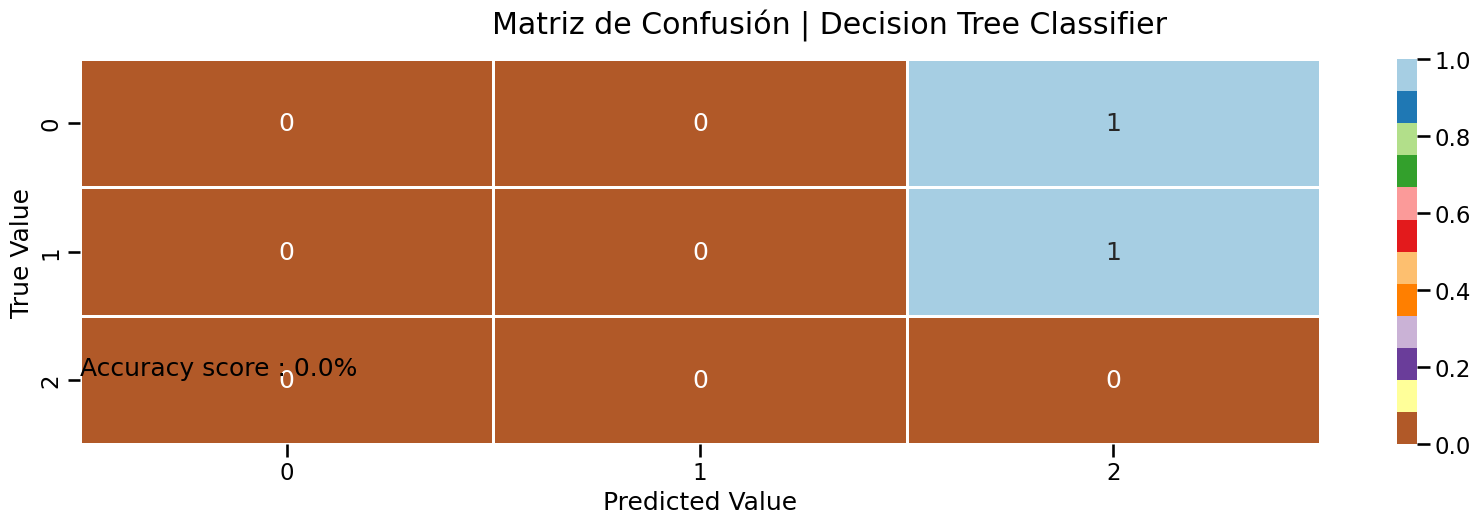

In [14]:
matriz_confusion(y_test, y_pred, 'Decision Tree Classifier')

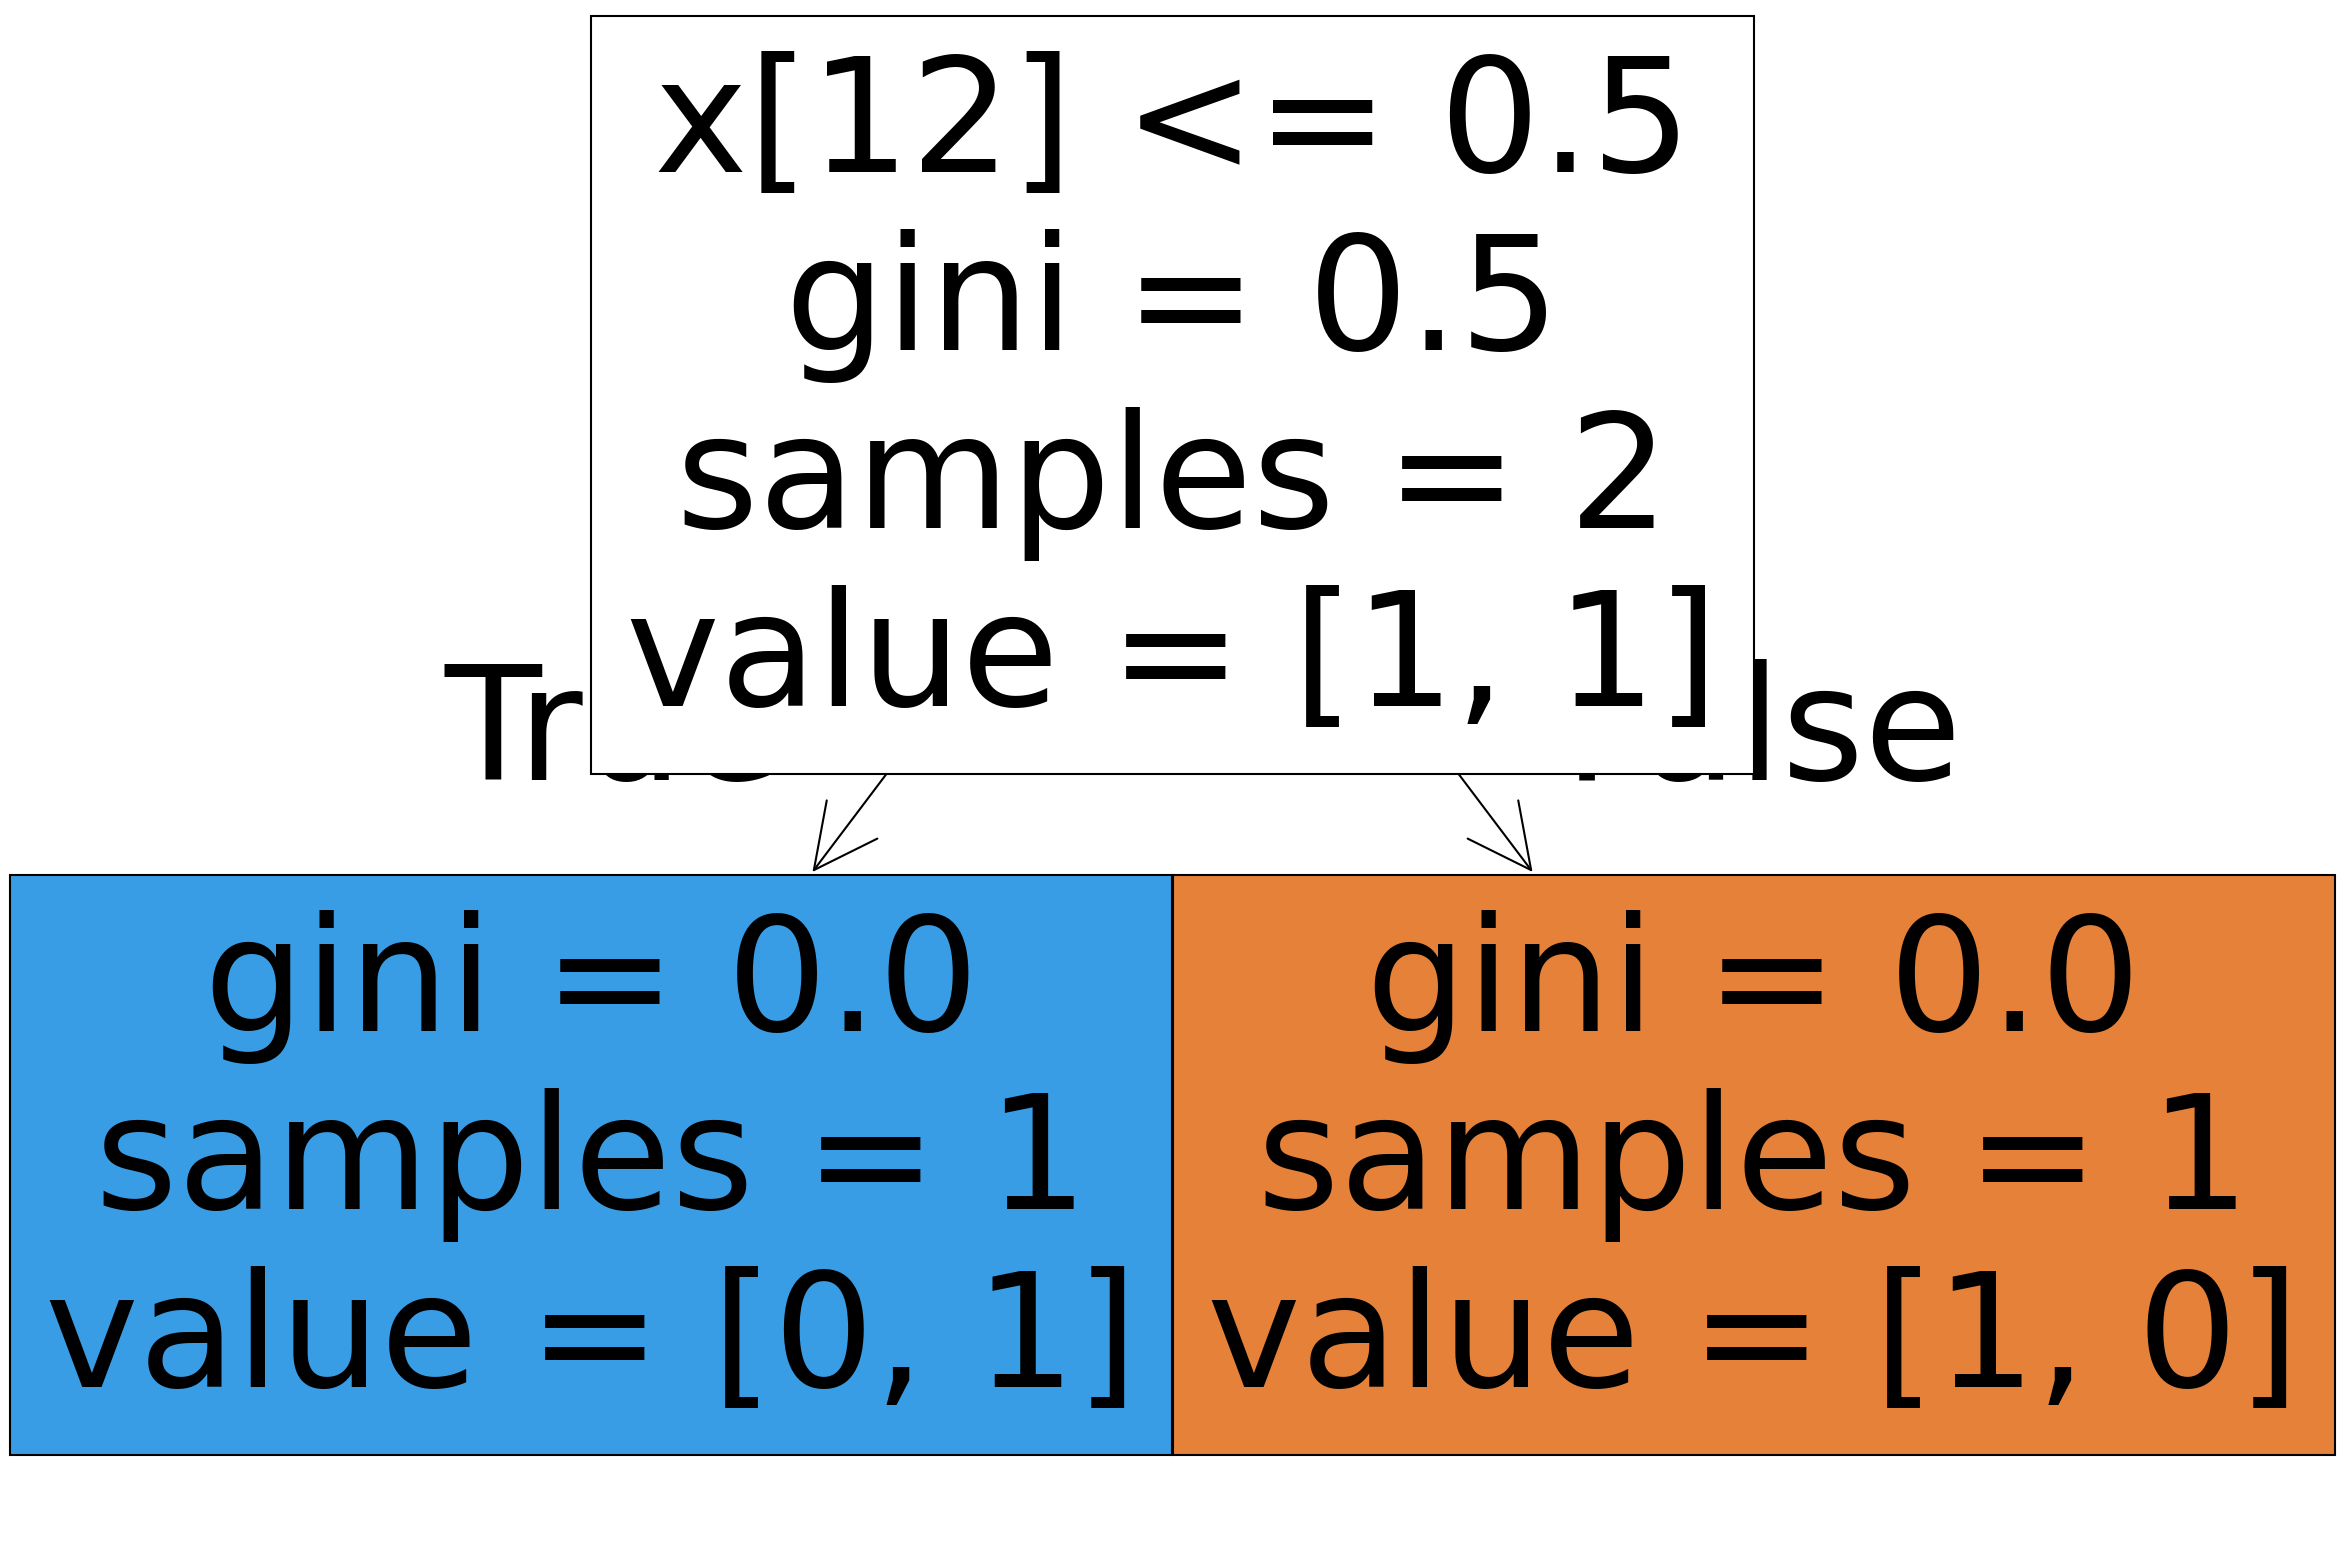

In [15]:
plt.figure(figsize=(30,20))
fig = plot_tree(tree_model, filled=True)
plt.savefig('tree_high_dpi', dpi=300)

# Naive Bayes

In [16]:
# Entrenar el modelo de Naive bayes
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

# Predicción y evaluación
y_pred = gnb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy:.2f}')

Precisión del modelo en el conjunto de prueba: 0.00


En este bloque de código entrena un modelo de clasificación utilizando Naive Bayes Gaussiano y evalúa su rendimiento en un conjunto de prueba. Este enfoque es particularmente útil para problemas de clasificación en los que se desea un modelo rápido y eficiente. La precisión obtenida proporciona una medida clara del desempeño del modelo, permitiendo identificar su efectividad en la tarea de clasificación.

In [17]:
msle  = mean_squared_log_error(y_pred,y_test)
rmsle = np.sqrt(msle)

print('RMLSE for the data:',rmsle)
print('MAE:',mean_absolute_error(y_pred,y_test))
print('MSE:',mean_squared_error(y_pred,y_test))

RMLSE for the data: 1.6259547556221956
MAE: 85.5
MSE: 7582.5


Este bloque de código calcula y muestra varias métricas clave para evaluar el rendimiento de un modelo:

RMSLE (Raíz del Error Cuadrático Logarítmico Medio): Proporciona una medida ajustada para errores logarítmicos, útil en contextos donde se desea penalizar más las subestimaciones.

MAE (Error Absoluto Medio): Indica el error promedio absoluto, ofreciendo una interpretación clara del rendimiento del modelo.

MSE (Error Cuadrático Medio): Mide el error cuadrático promedio, penalizando más fuertemente los errores grandes. Estas métricas son fundamentales para entender cómo se comporta el modelo con respecto a los datos reales y ayudan a guiar mejoras en su desempeño. Aunque estas métricas son típicamente utilizadas en contextos de regresión, si estás aplicando un modelo de clasificación, podría ser más apropiado considerar métricas específicas como precisión, recall o F1-score.

# Nearest Centroid Classifier

In [19]:
# Entrenar el modelo de Nearest Centroid Classifier
gnb_model = NearestCentroid()
gnb_model.fit(x_train, y_train)

# Predicción y evaluación
y_pred = gnb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo en el conjunto de prueba: {accuracy:.2f}')

Precisión del modelo en el conjunto de prueba: 0.00


La impresión de la precisión del modelo proporciona una medida clara de su rendimiento en el conjunto de prueba. Un valor alto indica que el modelo ha logrado clasificar correctamente una gran parte de los datos, lo cual es un buen indicativo de su efectividad.

In [20]:
msle  = mean_squared_log_error(y_pred,y_test)
rmsle = np.sqrt(msle)

print('RMLSE for the data:',rmsle)
print('MAE:',mean_absolute_error(y_pred,y_test))
print('MSE:',mean_squared_error(y_pred,y_test))

RMLSE for the data: 1.6259547556221956
MAE: 85.5
MSE: 7582.5


En este bloque de código se han calculado y presentado varias métricas clave para evaluar el rendimiento de un modelo de regresión, aunque también pueden ser aplicables en contextos de clasificación dependiendo del tipo de problema y los datos utilizados.